In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Time-Wasters on Social Media.csv", sep=',')
df.head()

Saving Time-Wasters on Social Media.csv to Time-Wasters on Social Media.csv


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


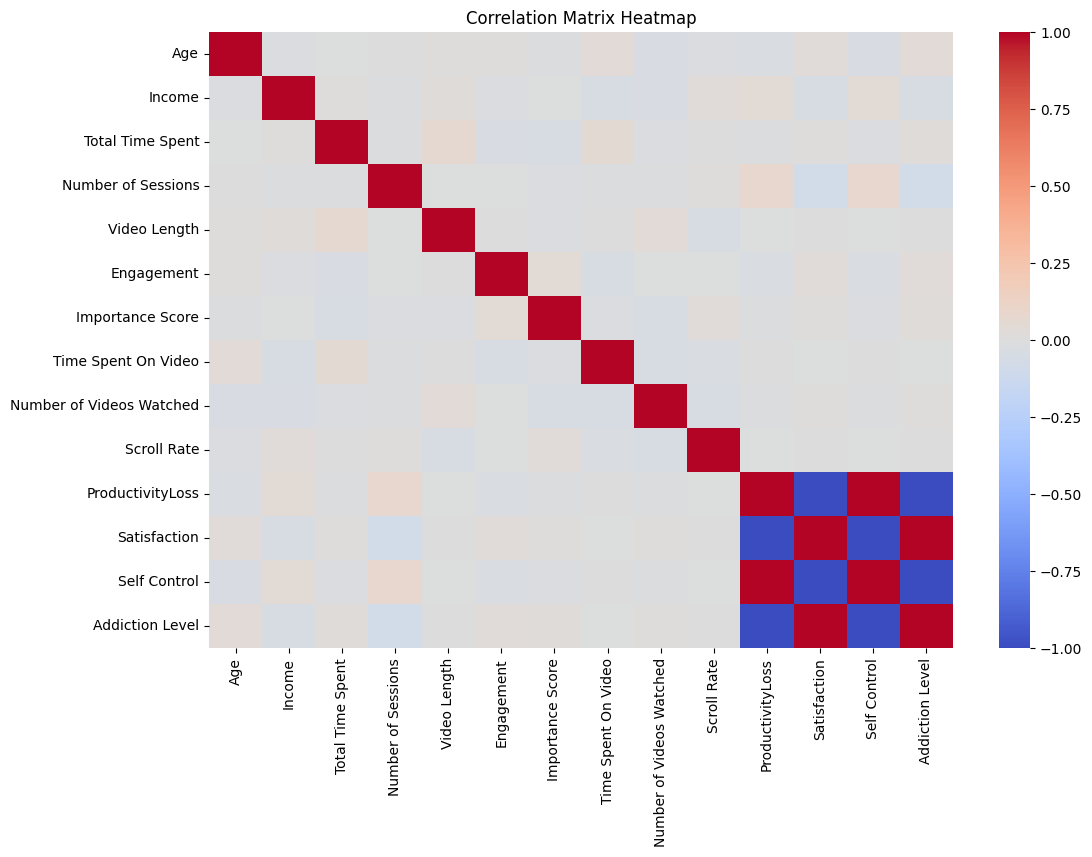

Correlation with Addiction Level:
 Addiction Level             1.000000
Satisfaction                0.994939
Age                         0.033493
Engagement                  0.027620
Importance Score            0.018474
Total Time Spent            0.016086
Number of Videos Watched    0.013286
Scroll Rate                 0.006758
Video Length                0.004914
Time Spent On Video        -0.000447
Income                     -0.039181
Number of Sessions         -0.080961
ProductivityLoss           -0.994939
Self Control               -1.000000
Name: Addiction Level, dtype: float64
Top 5 important features: ['Satisfaction', 'Age', 'Engagement', 'Importance Score', 'Total Time Spent']


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Drop irrelevant columns (example: IDs that don’t add predictive value)
df_fs = df.drop(columns=['UserID', 'Video ID'])

# Drop non-numeric columns
df_numeric = df_fs.select_dtypes(include=np.number)

#  Correlation matrix for numerical features
corr = df_numeric.corr()

#  Heatmap visualization to see feature relationships
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

#  Identify top correlations with the target (Addiction Level)
target_corr = corr['Addiction Level'].sort_values(ascending=False)
print("Correlation with Addiction Level:\n", target_corr)

#  Select top 5 correlated features with Addiction Level
important_features = target_corr.index[1:6].tolist()
print("Top 5 important features:", important_features)


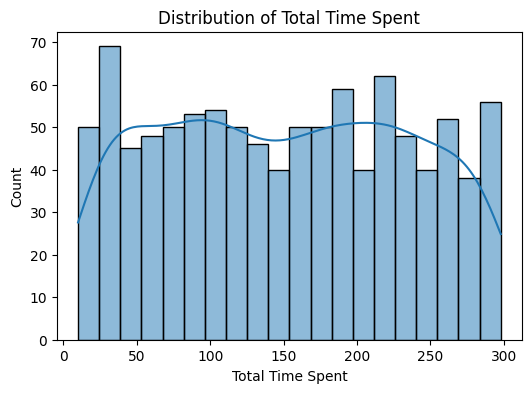

In [4]:
# Histogram for Total Time Spent
plt.figure(figsize=(6,4))
sns.histplot(df['Total Time Spent'], bins=20, kde=True)
plt.title("Distribution of Total Time Spent")
plt.show()

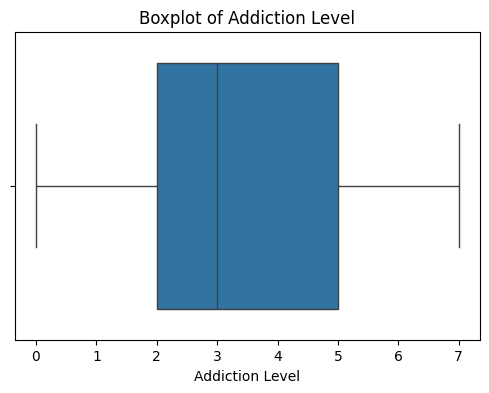

In [5]:
# Boxplot for Addiction Level
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Addiction Level'])
plt.title("Boxplot of Addiction Level")
plt.show()